#1.미니프로젝트 B1, SVM

##1.1.미리 준비할것

In [ ]:
# 패키지 임포트
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

##1.2.얼굴 이미지 특징 데이터 구하기

In [ ]:
# 사람 얼굴 이미지 15장 불러오기
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    face_images.append(img)

In [ ]:
# nRow x nCol 이미지 표시하는 함수 정의
def plot_images(nRow, nCol, img):
    fig =  plt.figure()
    fig, ax= plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:   axis=ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

<Figure size 640x480 with 0 Axes>

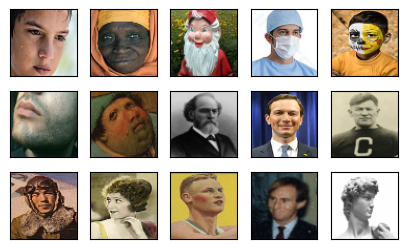

In [ ]:
# 불러온 사람 얼굴 이미지 15장 확인
plot_images(3,5, face_images)

##1.3.얼굴 이미지 특징 데이터 구하기

In [ ]:
# 사람 얼굴 이미지 특징 추출
face_hogs = []
face_features = []

for i in range(15):
    hog_desc, hog_image = hog(face_images[i], orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)
    face_hogs.append(hog_image)
    face_features.append(hog_desc)

<ipython-input-5-21acc570b0f4>:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(face_images[i], orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)


<Figure size 640x480 with 0 Axes>

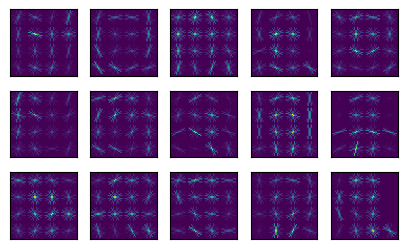

In [ ]:
# 히스토그램 이미지 가시화
plot_images(3,5, face_hogs)

In [ ]:
# 특징 벡터 크기 (128,) 확인
face_features[0].shape

(128,)

<Figure size 640x480 with 0 Axes>

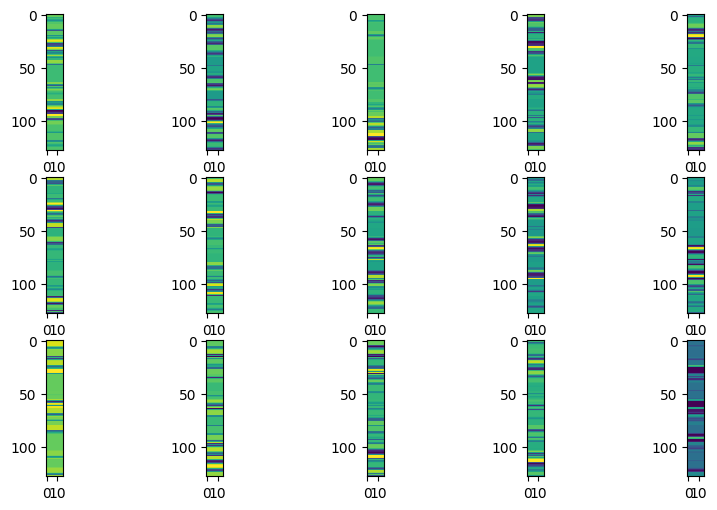

In [ ]:
# 특징 벡터 가시화
fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize=(10,6))
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(resize(face_features[i*5+j], (128, 16)))

##1.4.사람얼굴이 아닌 이미지의 특징 벡터 준비

<Figure size 640x480 with 0 Axes>

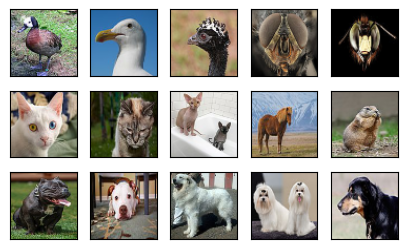

In [ ]:
# 사람 얼굴이 아닌 이미지 15장 불러오기
url ='https://github.com/dknife/ML/raw/main/data/Proj2/animals/'
animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64 ,64))
    animal_images.append(img)

# 불러온 사진 확인
plot_images(3,5, animal_images)

<ipython-input-10-e69f7bbf7534>:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(animal_images[i], orientations=8,


<Figure size 640x480 with 0 Axes>

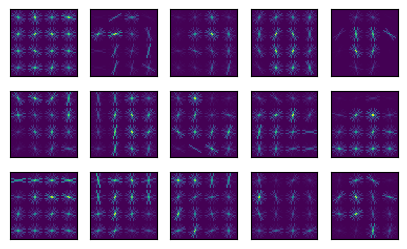

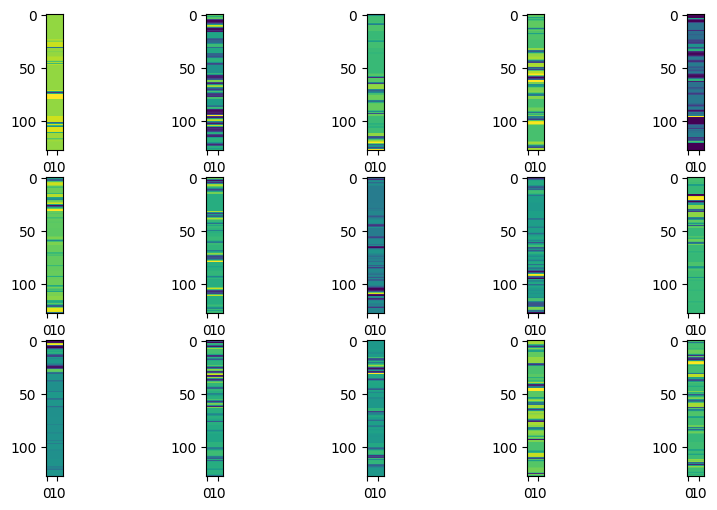

In [ ]:
# 15장 동물 이미지 특징 추출
animal_hogs =[]
animal_features = []

for i in range(15):
    hog_desc, hog_image = hog(animal_images[i], orientations=8, 
                              pixels_per_cell=(16,16), cells_per_block=(1,1),
                              visualize=True, multichannel=True)
    animal_hogs.append(hog_image)
    animal_features.append(hog_desc)

# 동물 이미지 특징 가시화
plot_images(3,5, animal_hogs)

# 동물 이미지 특징 벡터 가시화
fig, ax = plt.subplots(3,5, figsize = (10, 6))
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(resize(animal_features[i*5+j], (128,16)))

##1.5.학습을 위한 데이터만들어 학습하기

In [ ]:
# 얼굴 특징과 동물 특징을 1차원 배열로 연결
X, y = [],[]

for feature in face_features:
    X.append(feature)
    y.append(1)

for feature in animal_features:
    X.append(feature)
    y.append(0)
    
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# SVM 사용해서 학습시키기
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel='poly', degree=5, coef0=10.0))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [ ]:
# 학습에 사용한 데이터에 대해 예측 수행 -> 예측 잘됨
yhat =polynomial_svm_clf.predict(X)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

##1.6.새로운 데이터에 적용해 보기

<Figure size 640x480 with 0 Axes>

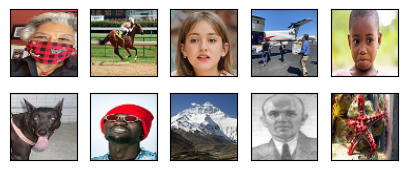

In [ ]:
# 새로운 이미지 10장 불러오기
url= 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'
test_images =  []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

# 사람, 동물 섞여 있음을 확인
plot_images(2,5,test_images)

In [ ]:
test_features = []
for i in range(10):
    hog_desc, hog_image = hog(test_images[i], orientations=8,
                              pixels_per_cell=(16,16), cells_per_block=(1,1),
                              visualize=True, multichannel=True)
    test_features.append(hog_desc)

# 새로운 이미지에 대해 예측 수행
test_result = polynomial_svm_clf.predict(test_features)
test_result

<ipython-input-15-0978fe3d62bc>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(test_images[i], orientations=8,


array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

<Figure size 640x480 with 0 Axes>

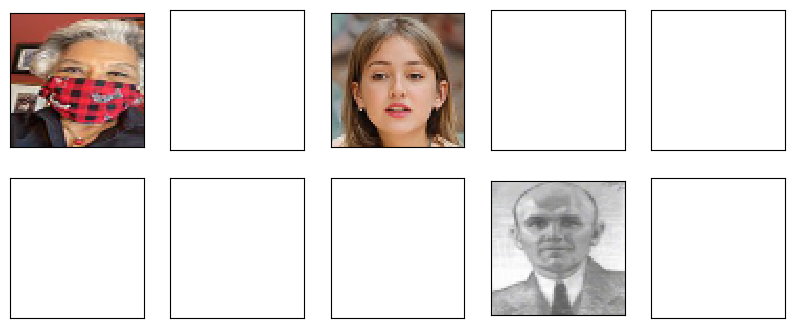

In [ ]:
# 새로운 데이터에 대해 예측이 잘 수행되지 않음
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize=(10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_result[i*5+j] == 1:
            ax[i,j].imshow(test_images[i*5+j], interpolation='nearest')

#2.미니프로젝트 B2, 얼굴찾기: CNN 활용하기

##2.1.데이터 확인

In [ ]:
# 패키지 임포트
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

In [ ]:
# 사람 얼굴 이미지 15장 준비
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'
face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    face_images.append(img)

<Figure size 640x480 with 0 Axes>

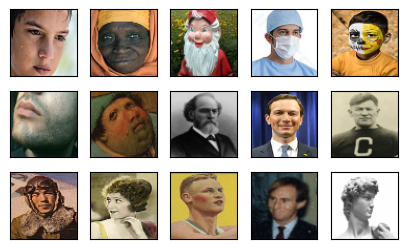

In [ ]:
# nRow x nCol 이미지 표시하는 함수 정의
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:  
                axis = ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, face_images)

##2.2.사람얼굴이 아닌 이미지 준비

<Figure size 640x480 with 0 Axes>

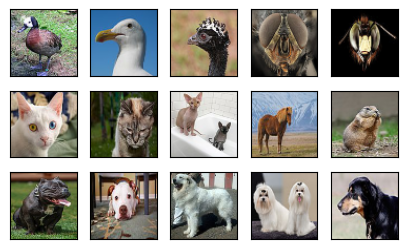

In [ ]:
# 사람 얼굴이 아닌 데이터 준비
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'
animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3,5, animal_images)

##2.3. 학습을 위한 데이터 만들기

In [ ]:
# 학습 데이터 구성
X = face_images + animal_images
y = [[1,0]] *len(face_images) + [[0,1]] *len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 64, 64, 3) (30, 2)


##2.4.학습을 위한 CNN 모델 만들기

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 모델 구성
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape = (64, 64, 3), kernel_size = (3,3), filters =32), #(3*3*3+1)*32 = 896
    keras.layers.MaxPooling2D((2,2), strides =2),
    keras.layers.Conv2D(kernel_size = (3,3), filters =32),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3,3), filters=32),
    keras.layers.MaxPooling2D((2,2), strides = 2),
    keras.layers.Conv2D(kernel_size = (3,3), filters=32),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'), 
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])


'''
파라미터 수 = (필터 높이 * 필터 너비 * 입력 채널 수 + 1) * 필터 수
파라미터 수 = (3 * 3 * 3 + 1) * 32 = 896
'''

'\n파라미터 수 = (필터 높이 * 필터 너비 * 입력 채널 수 + 1) * 필터 수\n파라미터 수 = (3 * 3 * 3 + 1) * 32 = 896\n'

In [ ]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
# 모델 학습
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 153ms/step - loss: 0.5851 - accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 0s 148ms/step - loss: 0.6878 - accuracy: 0.5667
Epoch 4/100
1/1 [==============================] - 0s 167ms/step - loss: 0.8031 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 155ms/step - loss: 0.5964 - accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 142ms/step - loss: 0.5474 - accuracy: 0.9333
Epoch 7/100
1/1 [==============================] - 0s 159ms/step - loss: 0.5472 - accuracy: 0.7667
Epoch 8/100
1/1 [==============================] - 0s 157ms/step - loss: 0.5444 - accuracy: 0.6333
Epoch 9/100
1/1 [==============================] - 0s 144ms/step - loss: 0.4958 - accuracy: 0.9333
Epoch 10/100
1/1 [==============================] - 0s 139ms/step - loss: 0.4740 - accuracy: 0.8667
Epoch 11/100

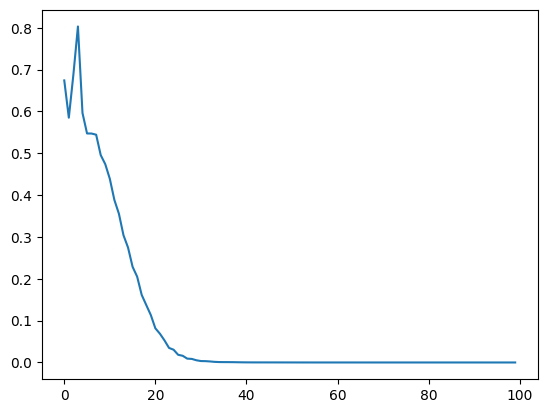

In [ ]:
# 에포크에 따른 손실 함수
plt.plot(history.history['loss'])

1/1 [==============================] - 0s 163ms/step


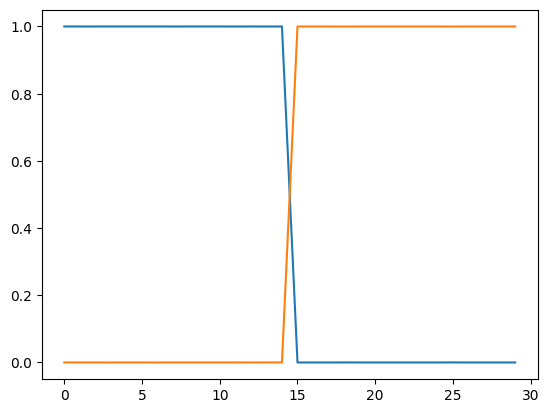

In [ ]:
# 학습 결과
yhat = model.predict(X)
plt.plot(yhat)

##2.5. 새로운 데이터에 적용해 보기

<Figure size 640x480 with 0 Axes>

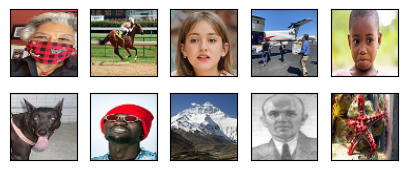

In [ ]:
# 학습과정에서 본 적이 없는 데이터를 얼마나 잘 분류하는지 확인하기 위한 데이터
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'
test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

# 사람, 동물 섞여 있음을 확인
test_images = np.array(test_images)
plot_images(2, 5, test_images)

1/1 [==============================] - 0s 49ms/step


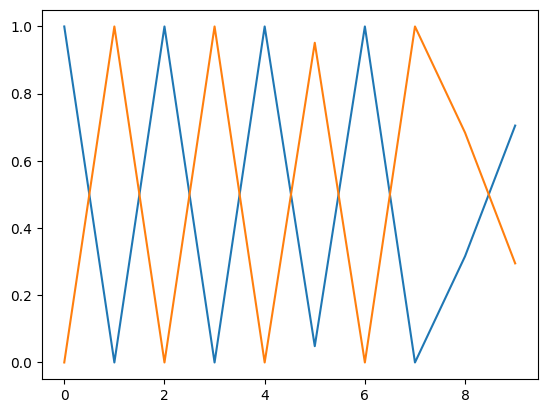

In [ ]:
# 새로운 데이터에 대해 예측, SVM보다 잘 분류하는 것을 확인할 수 있음
test_result = model.predict(test_images)
plt.plot(test_result)

<Figure size 640x480 with 0 Axes>

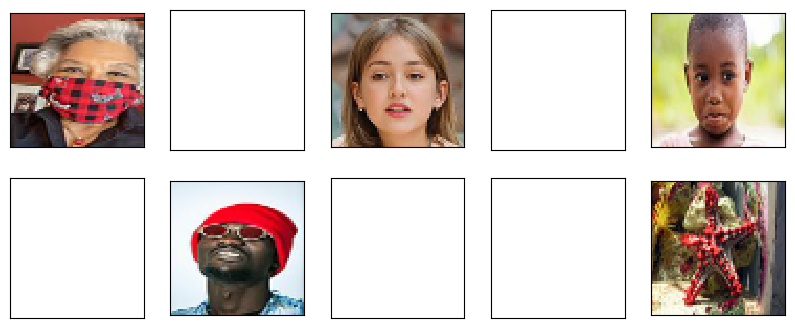

In [ ]:
# 얼굴 데이터라 판별한거 확인
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_result[i*5+j][0] > 0.5:
            ax[i,j].imshow(test_images[i*5+j], interpolation='nearest')

- SVM을 이용한 프로젝트와 비교했을 때, 이미지에 대한 사전 처리를 수행할 필요가 없다.
- SVM 프로젝트에서는 기울기 히스토그램을 통해 이미지 특징을 먼저 추출했다.
- CNN은 자동으로 특징을 찾아낸다.

#3.미니프로젝트 B3, 전이학습을 이용한 얼굴찾기

##3.1 데이터 확인

In [ ]:
# 패키지 임포트
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers
from keras.models import Model

<Figure size 640x480 with 0 Axes>

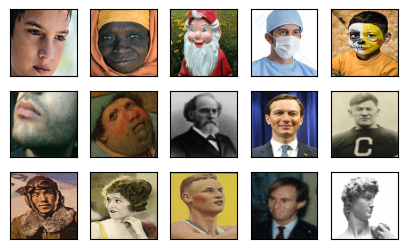

In [ ]:
# 사람 얼굴 이미지 15장 준비
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img,(75,75))
    face_images.append(img)

# nRow x nCol 이미지 표시하는 함수 정의
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <=1: 
                axis = ax[j]
            else:
                axis = ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

# 15장 사람 얼굴 이미지 찍어보기
plot_images(3,5, face_images)

##3.2. 사람 얼굴이 아닌 이미지 준비

<Figure size 640x480 with 0 Axes>

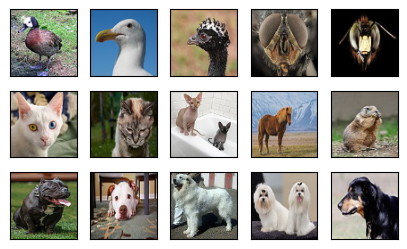

In [ ]:
# 사람 얼굴이 아닌 이미지 15장 불러오기
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []
for i in range(15):
    file = url +'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    animal_images.append(img)

plot_images(3,5, animal_images)

##3.3. 학습을 위한 데이터 만들기

In [ ]:
# 학습을 위한 데이터 X, y 만들기
X = face_images + animal_images
y = [[1]]*len(face_images) + [[0]]*len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 75, 75, 3) (30, 1)


##3.4.사전 훈련된 모델 가져오기

In [ ]:
# 다음과 같이 입력 크기를 지정하고 최상위 레이어는 제외하도록 생성
pre_trained_model = InceptionV3(input_shape=(75,75,3), include_top =False, weights=None)

In [ ]:
# 모델 요약
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [ ]:
# mixed7 이라는 이름을 가진 계층까지만 사용하고, 이후는 원하는 출력이 되도록 수정
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

In [ ]:
# 평균제곱 오차를 손실함수로, adam을 최적화 기법으로 사용
model = Model(pre_trained_model.input, my_layer)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

##3.5.전체 모델 새로 훈련시키기

In [ ]:
# 100 에포크 모델 훈련
history = model.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 21s 21s/step - loss: 0.2548 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.1387 - accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.3454 - accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.3501 - accuracy: 0.5667
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.0587 - accuracy: 0.9333
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.0674 - accuracy: 0.9000
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.0160 - accuracy: 0.9667
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 0.0688 - accuracy: 0.9333
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 0.0548 - accuracy: 0.9333
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 3.6668e-04 - accuracy: 1.0000
Epoch 11/100
1/1 [===============

1/1 [==============================] - 1s 1s/step


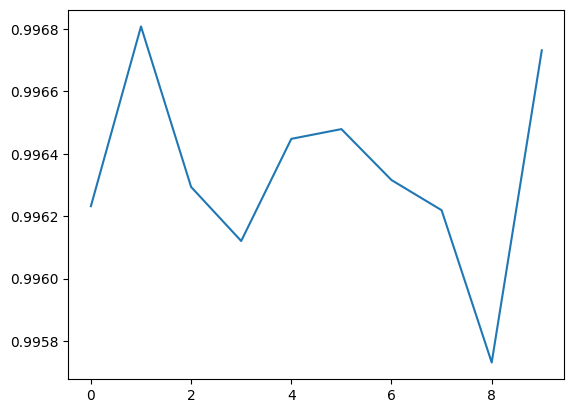

<Figure size 640x480 with 0 Axes>

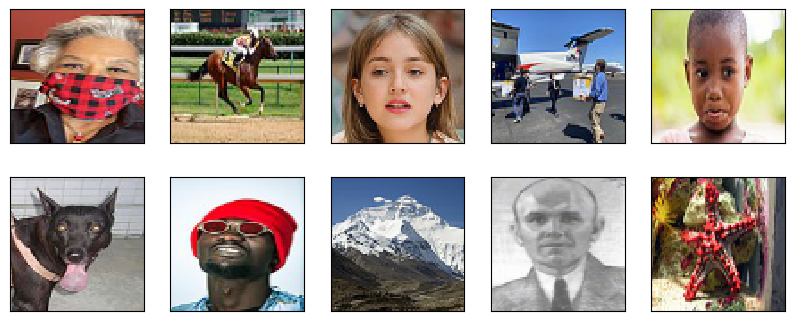

In [ ]:
# 테스트 이미지 10장 불러오기
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []
for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    test_images.append(img)

# 예측 결과 보기
test_images = np.array(test_images)
test_result = model.predict(test_images)
plt.plot(test_result)

# 사람 얼굴 이미지 판별 잘 했는지 보기 -> 결과가 안좋음
# 이유는 많은 파라미터를 훈련 시키기위한 학습데이터 
fig = plt.figure()
fig, ax = plt.subplots(2, 5, figsize =(10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:
            ax[i,j].imshow(test_images[i*5+j], interpolation='nearest')

##3.6.사전학습된 모델의 능력을 유지하는 훈련

In [ ]:
# mixed7 이라는 이름을 가진 계층까지만 사용하고, 이후는 원하는 출력이 되도록 수정
# 단, 학습 과정에 사전 학습 모델 일부 중 파라미터가 변하지 않게 함
frozen =  InceptionV3(input_shape=(75,75,3), include_top=False, weights='imagenet')
last_layer = frozen.get_layer('mixed7')
last_output = last_layer.output

for layer in frozen.layers:
    layer.trainable = False

In [ ]:
# 새로운 계층 붙이기
my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(frozen.input, my_layer)

# 모델 요약
transfer_learner.summary()
transfer_learner.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_98 (Conv2D)             (None, 37, 37, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 37, 37, 32)  96          ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 37, 37, 32)   0           ['batch_normalization_94[0]

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2634 - accuracy: 0.3667
Epoch 2/100
1/1 [==============================] - 0s 253ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 257ms/step - loss: 1.1945e-04 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 261ms/step - loss: 1.6729e-05 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 250ms/step - loss: 4.3887e-06 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 248ms/step - loss: 1.4216e-06 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 258ms/step - loss: 5.2758e-07 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 245ms/step - loss: 2.2140e-07 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 252ms/step - loss: 1.0309e-07 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 254ms/step - loss: 5.2831e-08

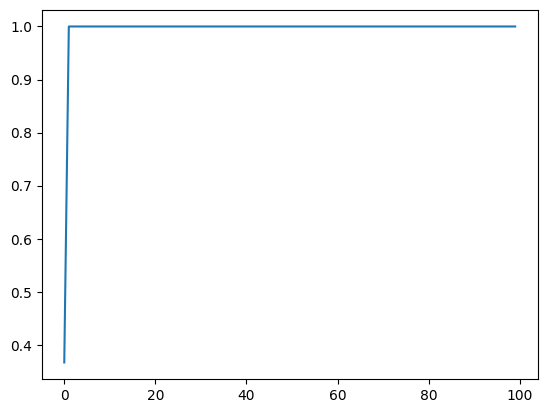

In [ ]:
# 새로운 모델 훈련 및 accuracy 그래프 보기, 정확도가 급속히 1에 근접하는 것을 확인할 수 있음
histroy = transfer_learner.fit(X, y, epochs=100, shuffle=True)
plt.plot(histroy.history['accuracy'])

1/1 [==============================] - 1s 1s/step


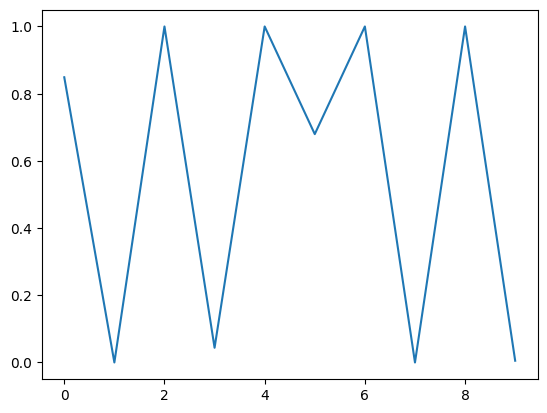

<Figure size 640x480 with 0 Axes>

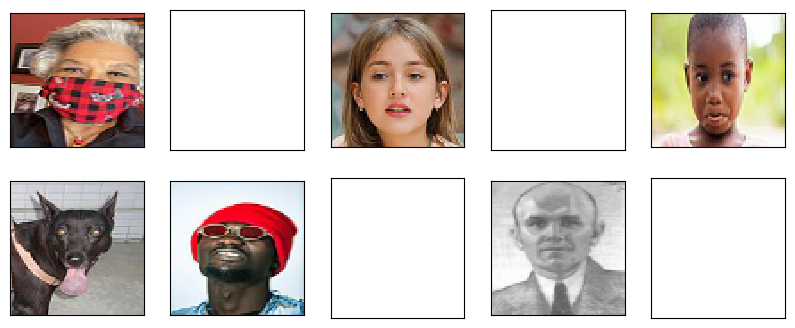

In [ ]:
# 테스트 이미지 예측 및 예측 결과 확인
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_result[i*5+j]> 0.5:
            ax[i,j].imshow(test_images[i*5+j], interpolation='nearest')

# 사전 훈련된 좋은 CNN모델을 가져와서 기존의 훈련 결과를 활용하면 적은 훈련으로도 좋은 능력을 갖게 만들 수 있다.

##3.7.VGG16 모델 사용하기

In [ ]:
from keras.applications.vgg16 import VGG16

# 옥스퍼드 대학 연구자들이 만든 VGG16 모델 사용하기
vgg16 = VGG16(weights = 'imagenet', include_top=False, input_shape=(75,75,3))

In [ ]:
# VGG16 모델 요약
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

In [ ]:
# 'block4_pool' 계층 까지만 사용하고 이후는 수정
last_layer = vgg16.get_layer('block4_pool')
last_output = last_layer.output

for layer in vgg16.layers:
    layer.trainable = False

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(vgg16.input, my_layer)
transfer_learner.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# 모델 요약
transfer_learner.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0   

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.2502 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.3170 - accuracy: 0.5667
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.0266 - accuracy: 0.9667
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.0171 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 2.0338e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 6.3106e-05 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 2.9005e-05 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 1.6468e-05 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 9.4577e-06 - accuracy: 1.0000
Epoch 11/100
1/1 [=

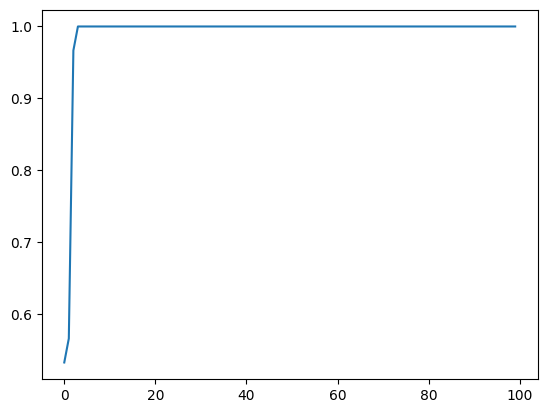

In [ ]:
# 학습 훈련 및 accuaracy 그래프 확인, 금세 1에 가까워지는 것을 확인
history = transfer_learner.fit(X, y, epochs = 100, shuffle=True)
plt.plot(history.history['accuracy'])

1/1 [==============================] - 1s 1s/step


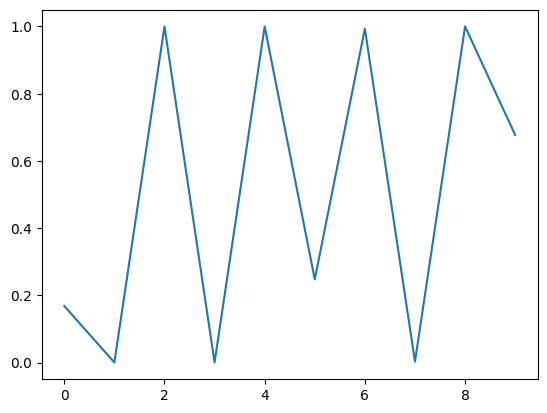

In [ ]:
# 테스트 이미지 예측해서 결과 출력
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

<Figure size 640x480 with 0 Axes>

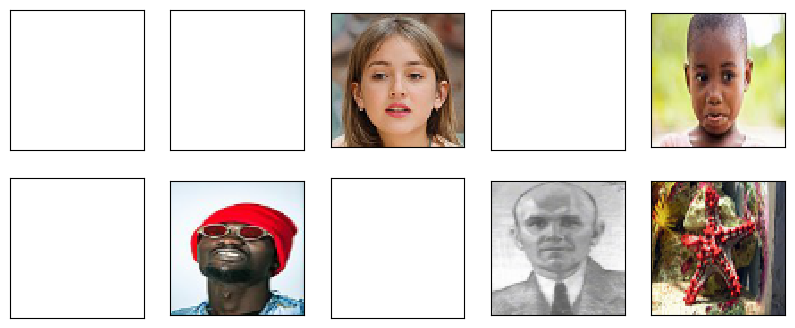

In [ ]:
# 훈련한 모델이 사람 얼굴이라 판단한 것들 이미지 찍어보기
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_result[i*5+j ]> 0.5:
            ax[i,j].imshow(test_images[i*5+j],interpolation='nearest')

#4.결과 비교

1) SVM을 이용한 얼굴 찾기: histogram of gradient를 사용해서 특징 추출을 하고 훈련시켜야함

2) CNN을 이용한 얼굴 찾기: 특징 추출을 따로 해줄 필요 없음

3) 전이학습을 이용한 얼굴 찾기: 특징 추출을 따로 해줄 필요도 없고, 사전 학습된 모델을 사용해 적은 훈련으로도 좋은 능력을 갖도록 할 수 있다.